In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
import pingouin
import warnings
warnings.simplefilter("ignore")

In [7]:
dem_data = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/dem_votes_potus_12_16.csv")
print(dem_data.head())

     state    county  dem_percent_12  dem_percent_16
0  Alabama   Bullock       76.305900       74.946921
1  Alabama   Chilton       19.453671       15.847352
2  Alabama      Clay       26.673672       18.674517
3  Alabama   Cullman       14.661752       10.028252
4  Alabama  Escambia       36.915731       31.020546


Visualizing the difference



Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.


In [11]:
#1. Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.

dem_data['diff'] = dem_data['dem_percent_12'] - dem_data['dem_percent_16']
print(dem_data.head())

     state    county  dem_percent_12  dem_percent_16      diff
0  Alabama   Bullock       76.305900       74.946921  1.358979
1  Alabama   Chilton       19.453671       15.847352  3.606319
2  Alabama      Clay       26.673672       18.674517  7.999155
3  Alabama   Cullman       14.661752       10.028252  4.633500
4  Alabama  Escambia       36.915731       31.020546  5.895185


In [15]:
#2. Calculate the mean of the diff column as xbar_diff

xbar_diff = dem_data['diff'].mean()
print(xbar_diff)

6.829312660106834


In [21]:
#3. Calculate the standard deviation of the diff column as s_diff

s_diff = dem_data['diff'].std()
print(s_diff)

#Calculating the sample size of the diff column
n_diff = len(dem_data['diff'])
print(n_diff)

5.040139140132317
500


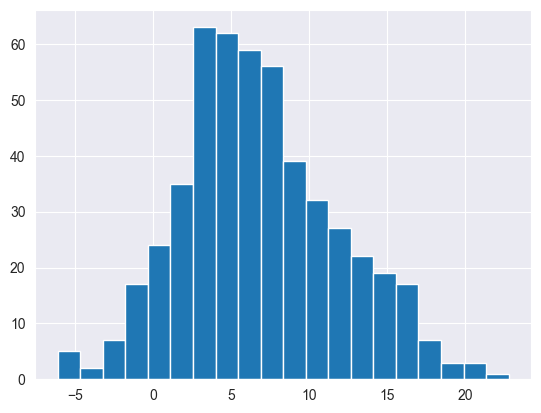

In [17]:
#4. Plot a histogram of the diff column with 20 bins.

plt.hist(dem_data['diff'], bins=20)
plt.show()

Using TTEST()




Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.





H₀: The proportion of democratic votes in 2012 and 2016 were the same.


Hₐ: The proportion of democratic votes in 2012 and 2016 were different.

In [25]:
#1. Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".

#Calculating t_stat
t_stat = (xbar_diff - 0)/ np.sqrt(s_diff ** 2/n_diff)
print(t_stat)


p_value = pingouin.ttest(x=dem_data['diff'], y=0, alternative='two-sided')
print(p_value)

30.298384475151405
                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10 power  
T-test  2.246e+111   NaN  


In [29]:
#2. Conduct a paired test on the democratic votes in 2012 and 2016 (the dem_percent_12 and dem_percent_16 columns of sample_dem_data), using an appropriate alternative hypothesis.

p_val = pingouin.ttest(x=dem_data['dem_percent_12'], y=dem_data['dem_percent_16'], paired=True, alternative='two-sided')
print(p_val)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10 power  
T-test  2.246e+111   NaN  
